In [32]:
"""
Load dataframe and remove columns with static or missing values
"""
import pandas as pd

path = "../../data/processed/8.8_ajo/prom/2 mbps/worker1.feather"
df = pd.read_feather(path)

# Count number of rows and cols in the original df
print(f"Loaded {len(df)} rows and {len(df.columns)} columns")

# Count the number of unique values in each column
unique_counts = df.nunique()

# Find all static columns (columns with only one or two unique values)
static_columns = unique_counts[unique_counts <= 2].index

# Remove the static columns from the dataframe
df = df.drop(static_columns, axis=1)
print(f"Removing {len(static_columns)} static columns ({len(df.columns)} remaining)")

if len(df.columns) < 100:
    # Only display if the df is small enough to not stall the IDE (thousands of columns really slows things down)
    df.head()

Loaded 715 rows and 162153 columns
Removing 161449 static columns (704 remaining)


In [33]:
"""
Change the dataframe headers to a more human-readable format
"""

from utils.header_cleaner import clean_up_headers
cleaned_df = clean_up_headers(df)
cleaned_df



Unable to read timestamp as json


,timestamp,go_gc_duration_seconds_quantile_0,go_gc_duration_seconds_quantile_0.25,go_gc_duration_seconds_quantile_0.5,go_gc_duration_seconds_quantile_0.75,go_gc_duration_seconds_quantile_1,go_gc_duration_seconds_count,go_gc_duration_seconds_sum,go_memstats_alloc_bytes,go_memstats_alloc_bytes_total,...,node_thermal_zone_temp_zone_2,node_time_seconds,node_timex_maxerror_seconds,node_timex_offset_seconds,node_vmstat_pgfault,node_vmstat_pgmajfault,node_vmstat_pgpgin,node_vmstat_pgpgout,process_cpu_seconds_total,promhttp_metric_handler_requests_total
0,1723037752,0.000017,0.000018,0.000019,0.000020,0.000035,6880,0.133020,1984936,12676684712,...,33,1.723038e+09,0.1730,0.002627,9235885842,29951,8826680,198662493,72.67,7402
1,1723037757,0.000017,0.000018,0.000019,0.000020,0.000035,6880,0.133020,1984936,12676684712,...,33,1.723038e+09,0.1730,0.002627,9235885842,29951,8826680,198662493,72.67,7402
2,1723037762,0.000017,0.000018,0.000019,0.000020,0.000035,6881,0.133038,1975512,12678501944,...,31,1.723038e+09,0.1805,0.002551,9235930720,29951,8826680,198662669,72.67,7403
3,1723037767,0.000017,0.000018,0.000019,0.000020,0.000035,6881,0.133038,1975512,12678501944,...,31,1.723038e+09,0.1805,0.002551,9235930720,29951,8826680,198662669,72.67,7403
4,1723037772,0.000017,0.000018,0.000019,0.000020,0.000035,6881,0.133038,1975512,12678501944,...,31,1.723038e+09,0.1805,0.002551,9235930720,29951,8826680,198662669,72.67,7403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
710,1723041302,0.000017,0.000018,0.000019,0.000019,0.000044,7117,0.137550,1975176,13107304584,...,42,1.723041e+09,0.9265,-0.000006,9357617009,29957,8827196,198837361,75.16,7639
711,1723041307,0.000017,0.000018,0.000019,0.000019,0.000044,7117,0.137550,1975176,13107304584,...,42,1.723041e+09,0.9265,-0.000006,9357617009,29957,8827196,198837361,75.16,7639
712,1723041312,0.000017,0.000018,0.000019,0.000019,0.000044,7117,0.137550,1975176,13107304584,...,42,1.723041e+09,0.9265,-0.000006,9357617009,29957,8827196,198837361,75.16,7639
713,1723041317,0.000017,0.000018,0.000019,0.000019,0.000044,7118,0.137568,1975528,13109119248,...,38,1.723041e+09,0.9340,-0.000006,9357920453,29957,8827196,198838101,75.17,7640


['kepler_node_core_joules_total_mode_idle', 'kepler_node_uncore_joules_total_mode_idle', 'kepler_node_package_joules_total_mode_idle', 'kepler_node_core_joules_total_mode_dynamic', 'kepler_node_uncore_joules_total_mode_dynamic', 'kepler_node_package_joules_total_mode_dynamic']


<Axes: >

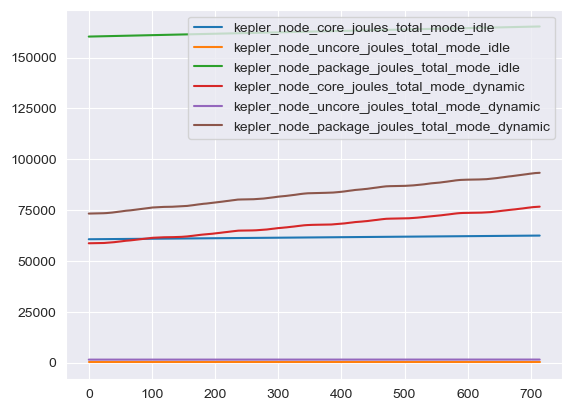

In [41]:
"""
TODO: Extend this script to do some plotting (maybe copy-and-paste this code into separate file first)
"""

import difflib
target_word = 'kepler node joules total'
closest_matches = difflib.get_close_matches(target_word, cleaned_df.columns, n = 6,  cutoff=0.05)
print(closest_matches)
cleaned_df[closest_matches].plot()